In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd


In [2]:
processed_data=[]

filename='/Users/yitengxu/Desktop/PaperScraper-Final/result_collected/combined_JSON/combined_cleared_all.json'
with open(filename, 'r') as file:
    processed_data = json.load(file)
    
toprint=pd.DataFrame(processed_data)


In [3]:
def classify_and_plot_extraction_statistics(processed_data):
    counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    classified_data = {'contain1': [], 'contain2': [], 'contain3': [], 'contain4': [], 'contain5': []}

    for item in processed_data:
        success_count = sum(1 for key in ['Absorber Layer', 'PCE', 'Voc', 'Jsc', 'FF'] if key in item and item[key] is not None)
        if success_count > 0:  # Change the condition here
            counts[success_count] += 1
            classified_data[f'contain{success_count}'].append(item)


    return classified_data

# Assuming processed_data is the provided data

classified_data = classify_and_plot_extraction_statistics(processed_data)
print(len(classified_data['contain5']))

2265


In [4]:
import json

def save_to_json(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

file_path = '/Users/yitengxu/Desktop/PaperScraper-Final/result_collected/combined_JSON/classified_data_all.json'
save_to_json(classified_data, file_path)


In [5]:
def process_contain5_data(data):
    # 用于存储单位
    units = {'PCE': None, 'Voc': None, 'Jsc': None, 'FF': None}
    correct_data = []
    incorrect_data = []

    # 遍历数据，确保单位一致，并检查值是否满足等式
    for item in data:
        # 检查并存储单位
        
        mismatch = False
        for key in units.keys():
            unit = item[key]['unit']
            if units[key] is None:
                units[key] = unit
            elif units[key] != unit:
                print(f"Unit mismatch for {key}: expected {units[key]}, found {unit}")
                mismatch = True
                
        if mismatch:
            print("Mismatched item:", item)  # 打印不匹配的JSON源
            continue
        # 计算等式的左侧和右侧
        left_side = item['PCE']['value']   # PCE单位为百分比
        right_side = item['FF']['value']  * item['Jsc']['value']  * item['Voc']['value'] /100  # FF单位为百分比
        
        # 检查等式是否成立（允许+-5mA/cm2以内的误差）
        if  right_side / item['Jsc']['value'] * (item['Jsc']['value']-5)  <= left_side <= right_side / item['Jsc']['value'] * (item['Jsc']['value']+5):
            correct_data.append(item)
        else:
            incorrect_data.append(item)
        # 检查等式是否成立（允许10%以内的误差）
        """
        if 0.9 * right_side <= left_side <= 1.1 * right_side:
            correct_data.append(item)
        else:
            incorrect_data.append(item) 
        """
       

    print("Units:")
    print(units)
    print(f"Number of correct data: {len(correct_data)}")
    print(f"Number of incorrect data: {len(incorrect_data)}")

    return correct_data, incorrect_data

# 示例用法
correct_data, incorrect_data = process_contain5_data(classified_data['contain5'])


Unit mismatch for Voc: expected V, found %
Unit mismatch for Jsc: expected mA/cm2, found %
Mismatched item: {'Absorber Layer': 'MAPbI3', 'PCE': {'value': 63.0, 'error': None, 'unit': '%'}, 'Voc': {'value': 95.0, 'error': None, 'unit': '%'}, 'Jsc': {'value': 83.0, 'error': None, 'unit': '%'}, 'FF': {'value': 77.0, 'error': None, 'unit': '%'}}
Unit mismatch for Voc: expected V, found %
Unit mismatch for Jsc: expected mA/cm2, found %
Mismatched item: {'Absorber Layer': 'MA-NVA', 'PCE': {'value': 90.0, 'error': None, 'unit': '%'}, 'Voc': {'value': 97.0, 'error': None, 'unit': '%'}, 'Jsc': {'value': 10.0, 'error': None, 'unit': '%'}, 'FF': {'value': 10.0, 'error': None, 'unit': '%'}}
Unit mismatch for Jsc: expected mA/cm2, found %
Mismatched item: {'Absorber Layer': 'P3HT/(1 wt% BCNs)', 'PCE': {'value': 8.3, 'error': None, 'unit': '%'}, 'Voc': {'value': 0.86, 'error': None, 'unit': 'V'}, 'Jsc': {'value': 35.0, 'error': None, 'unit': '%'}, 'FF': {'value': 11.0, 'error': None, 'unit': '%'}}
U

In [6]:


#print(pd.DataFrame(incorrect_data[7]))

print(pd.DataFrame(correct_data[8]))

      Absorber Layer   PCE    Voc     Jsc    FF
value      PDTP-DFBT   5.0  0.704    12.4  54.0
error      PDTP-DFBT  None   None    None  None
unit       PDTP-DFBT     %      V  mA/cm2     %


In [7]:
print(len(classified_data['contain5']))

Total_number = len(classified_data['contain1']) + len(classified_data['contain2']) + len(classified_data['contain3']) +len(classified_data['contain4']) +len(classified_data['contain5'])

print(Total_number)


print(str(726/1283*100)+ '%')

2265
3122
56.586126266562744%


In [8]:
precision = len(correct_data) / (len(correct_data) + len(incorrect_data))

FN = Total_number - len(classified_data['contain5'])
recall = len(correct_data) / ((len(correct_data)) + FN)

F_score = 2 * (precision * recall) / (precision + recall)
print('The TP is '+ str(len(correct_data)))
print('The FP is '+ str(len(incorrect_data)))
print('The FN is '+ str(FN))

print('The F-scorse is '+ str(F_score))
print('The precision is '+ str(precision))
print('The recall is '+ str(recall))

The TP is 2023
The FP is 236
The FN is 857
The F-scorse is 0.7873127067522865
The precision is 0.8955289951305887
The recall is 0.7024305555555556


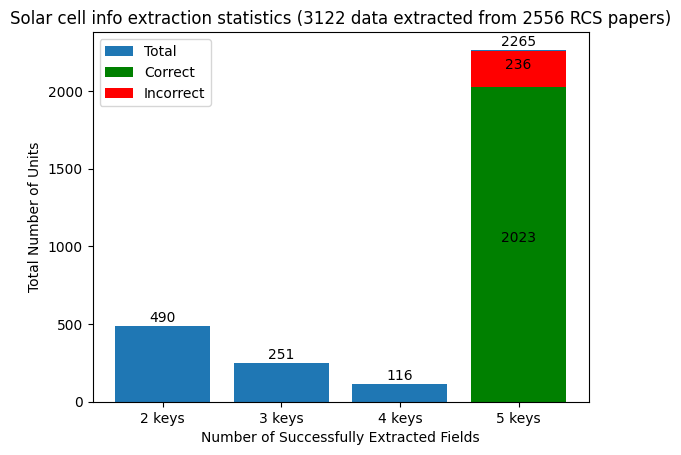

In [9]:
import matplotlib.pyplot as plt

# Calculate lengths for each subcategory
contain2_len = len(classified_data['contain2'])
contain3_len = len(classified_data['contain3'])
contain4_len = len(classified_data['contain4'])
contain5_len = len(classified_data['contain5'])

# Create a bar plot
plt.bar(['2 keys', '3 keys', '4 keys', '5 keys'], [contain2_len, contain3_len, contain4_len, contain5_len], label='Total')
plt.bar('5 keys', len(correct_data), color='green', label='Correct')
plt.bar('5 keys', len(incorrect_data), bottom=len(correct_data), color='red', label='Incorrect')

# Add labels and title
plt.xlabel('Number of Successfully Extracted Fields')
plt.ylabel('Total Number of Units')
plt.title('Solar cell info extraction statistics (3122 data extracted from 2556 RCS papers)')
plt.legend()

# Adjust y positions for text labels to prevent overlapping
for category, value in zip(['2 keys', '3 keys', '4 keys', '5 keys'], [contain2_len, contain3_len, contain4_len, contain5_len]):
    plt.text(category, value + 5, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.text('5 keys', len(correct_data)/2 , str(len(correct_data)), ha='center', va='bottom', fontsize=10, color='black')
plt.text('5 keys', len(correct_data) + len(incorrect_data)/2 -15, str(len(incorrect_data)), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()


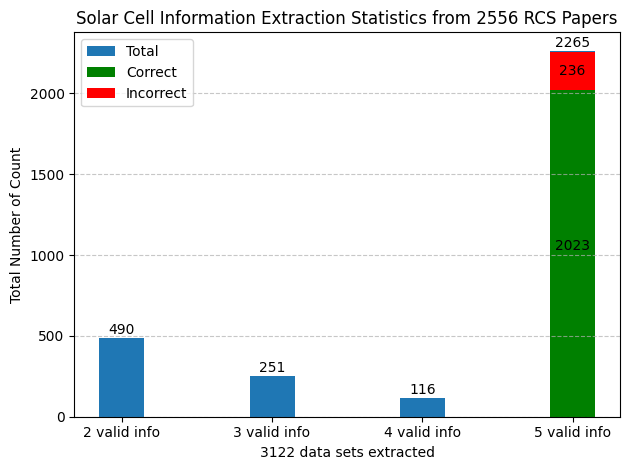

In [10]:
import matplotlib.pyplot as plt

# Calculate lengths for each subcategory
contain2_len = len(classified_data['contain2'])
contain3_len = len(classified_data['contain3'])
contain4_len = len(classified_data['contain4'])
contain5_len = len(classified_data['contain5'])

# Define bar positions and widths
bar_positions = [1, 2, 3, 4]
bar_width = 0.3

# Create a bar plot
plt.bar(bar_positions, [contain2_len, contain3_len, contain4_len, contain5_len], width=bar_width, label='Total')
plt.bar(bar_positions[3], len(correct_data), color='green', width=bar_width, label='Correct')
plt.bar(bar_positions[3], len(incorrect_data), bottom=len(correct_data), color='red', width=bar_width, label='Incorrect')

# Add labels and title
plt.xlabel('3122 data sets extracted')
plt.ylabel('Total Number of Count')
plt.title('Solar Cell Information Extraction Statistics from 2556 RCS Papers')
plt.legend()

# Adjust y positions for text labels to prevent overlapping
for pos, value in zip(bar_positions, [contain2_len, contain3_len, contain4_len, contain5_len]):
    plt.text(pos, value + 5, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.text(bar_positions[3], len(correct_data)/2 , str(len(correct_data)), ha='center', va='bottom', fontsize=10, color='black')
plt.text(bar_positions[3], len(correct_data) + len(incorrect_data)/3.2 , str(len(incorrect_data)), ha='center', va='bottom', fontsize=10, color='black')

# Set x ticks and labels
plt.xticks(bar_positions, ['2 valid info', '3 valid info', '4 valid info', '5 valid info'])

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle= '', alpha=0.7)
# Show the plot
plt.tight_layout()  # Improved layout to prevent text cutoff
plt.show()


In [11]:



# 定义一个函数来展平包含值、误差和单位的字典
def flatten_parameter(param_dict):
    return param_dict['value'] if param_dict else None, param_dict['error'] if param_dict else None

# 展平"contain5"部分的数据结构
incorrect_data_flattened = []
for item in incorrect_data:
    flattened_item = {
        'Absorber Layer': item['Absorber Layer'],
        'PCE_value': flatten_parameter(item['PCE'])[0],
        'PCE_error': flatten_parameter(item['PCE'])[1],
        'Voc_value': flatten_parameter(item['Voc'])[0],
        'Voc_error': flatten_parameter(item['Voc'])[1],
        'Jsc_value': flatten_parameter(item['Jsc'])[0],
        'Jsc_error': flatten_parameter(item['Jsc'])[1],
        'FF_value': flatten_parameter(item['FF'])[0],
        'FF_error': flatten_parameter(item['FF'])
    }
    incorrect_data_flattened.append(flattened_item)
# 转换为Pandas DataFrame
incorrect_data_pd = pd.DataFrame(incorrect_data_flattened)


# 显示前几行数据
incorrect_data_pd.iloc[:]

,Absorber Layer,PCE_value,PCE_error,Voc_value,Voc_error,Jsc_value,Jsc_error,FF_value,FF_error
0,PTB7-Th:PC70BM,8.49,NaN,0.760,NaN,68.00,NaN,68.00,"(68.0, None)"
1,FAPbI3)0.85(MAPbBr3)0.15,16.00,NaN,1.081,NaN,2.00,NaN,66.00,"(66.0, None)"
2,LPP1,8.32,NaN,0.736,NaN,43.17,NaN,58.70,"(58.7, None)"
3,LPP2,8.86,NaN,0.743,NaN,51.47,NaN,59.60,"(59.6, None)"
4,86,2.30,NaN,0.600,NaN,2.00,NaN,39.00,"(39.0, None)"
...,...,...,...,...,...,...,...,...,...
231,SnO2,6.80,NaN,0.760,0.007,2.00,NaN,61.00,"(61.0, None)"
232,ACIGS-1,12.90,NaN,2.120,NaN,992.00,NaN,65.50,"(65.5, None)"
233,ACIGS-2,16.06,NaN,2.120,NaN,902.00,NaN,65.50,"(65.5, None)"
234,Cs2AgBiBr6-MACl,2.03,NaN,0.870,NaN,2.38,NaN,2.03,"(2.03, None)"


In [12]:



# 定义一个函数来展平包含值、误差和单位的字典
def flatten_parameter(param_dict):
    return param_dict['value'] if param_dict else None, param_dict['error'] if param_dict else None

# 展平"contain5"部分的数据结构
correct_data_flattened = []
for item in correct_data:
    flattened_item = {
        'Absorber Layer': item['Absorber Layer'],
        'PCE_value': flatten_parameter(item['PCE'])[0],
        'PCE_error': flatten_parameter(item['PCE'])[1],
        'Voc_value': flatten_parameter(item['Voc'])[0],
        'Voc_error': flatten_parameter(item['Voc'])[1],
        'Jsc_value': flatten_parameter(item['Jsc'])[0],
        'Jsc_error': flatten_parameter(item['Jsc'])[1],
        'FF_value': flatten_parameter(item['FF'])[0],
        'FF_error': flatten_parameter(item['FF'])
    }
    correct_data_flattened.append(flattened_item)
# 转换为Pandas DataFrame
correct_data_pd = pd.DataFrame(correct_data_flattened)


# 显示前几行数据
correct_data_pd.iloc[1300:1320]




,Absorber Layer,PCE_value,PCE_error,Voc_value,Voc_error,Jsc_value,Jsc_error,FF_value,FF_error
1300,TiO2 nanofibers,11.16,NaN,0.953,NaN,19.52,NaN,60.00,"(60.0, None)"
1301,Au@TiO2 nanofibers,14.92,NaN,0.986,NaN,21.63,NaN,70.00,"(70.0, None)"
1302,DTCz-TBT,1.24,NaN,1.020,NaN,4.55,NaN,27.00,"(27.0, None)"
1303,DTCz-2TBT,3.44,NaN,0.920,NaN,8.52,NaN,44.00,"(44.0, None)"
1304,DTCz-3TBT,3.90,NaN,0.860,NaN,9.80,NaN,46.00,"(46.0, None)"
1305,P2/PC71BM,1.50,NaN,0.800,NaN,3.43,NaN,54.70,"(54.7, None)"
1306,P3/PC71BM,3.70,NaN,0.890,NaN,7.01,NaN,58.60,"(58.6, None)"
1307,PCDTBT,4.35,NaN,0.890,NaN,9.42,NaN,51.00,"(51.0, None)"
1308,PCDTBT:[70]PCBM,4.57,NaN,0.890,NaN,10.22,NaN,51.00,"(51.0, None)"
1309,PTB7-Th and IEICO-4F with different weight rat...,10.63,NaN,0.730,NaN,22.28,NaN,66.00,"(66.0, None)"


In [13]:
correct_data_pd.to_csv('correct_data.csv')


In [14]:
contain5_statistics = correct_data_pd.describe()
contain5_statistics

,PCE_value,PCE_error,Voc_value,Voc_error,Jsc_value,Jsc_error,FF_value
count,2023.000000,34.000000,2023.000000,34.000000,2023.000000,36.000000,2023.000000
mean,7.549567,0.143509,0.850798,0.014029,13.348876,0.334444,59.762981
std,5.780899,0.225506,0.586624,0.011202,7.333599,0.591600,14.800981
min,0.005000,0.000300,0.100000,0.000000,0.041000,0.010000,3.760000
25%,2.870000,0.035000,0.680000,0.010000,7.500000,0.057500,50.000000
50%,6.230000,0.100000,0.810000,0.010000,13.390000,0.135000,62.200000
75%,11.030000,0.110000,0.951500,0.019250,18.990000,0.245000,70.000000
max,30.120000,1.000000,17.160000,0.050000,42.340000,2.900000,191.000000


1. 分布分析
我们将首先通过绘制直方图来查看各参数的分布情况。这有助于我们了解每个参数的分布特征。

In [15]:
in_contain5_statistics = incorrect_data_pd.describe()
in_contain5_statistics

,PCE_value,PCE_error,Voc_value,Voc_error,Jsc_value,Jsc_error,FF_value
count,236.000000,6.000000,236.000000,12.000000,236.000000,6.000000,236.000000
mean,18.072161,0.491500,40.570986,0.072917,1834.823975,0.453333,58.880831
std,130.811091,0.975109,206.343913,0.091673,10561.648391,0.232092,130.843803
min,0.298000,0.002000,0.150000,0.007000,0.080000,0.200000,1.000000
25%,4.635000,0.002000,0.657500,0.007000,2.000000,0.300000,32.000000
50%,8.595000,0.002500,0.867000,0.010000,8.575000,0.400000,59.150000
75%,12.750000,0.375750,0.972500,0.130000,21.700000,0.575000,68.025000
max,2015.000000,2.440000,2015.000000,0.250000,86480.000000,0.820000,2015.000000


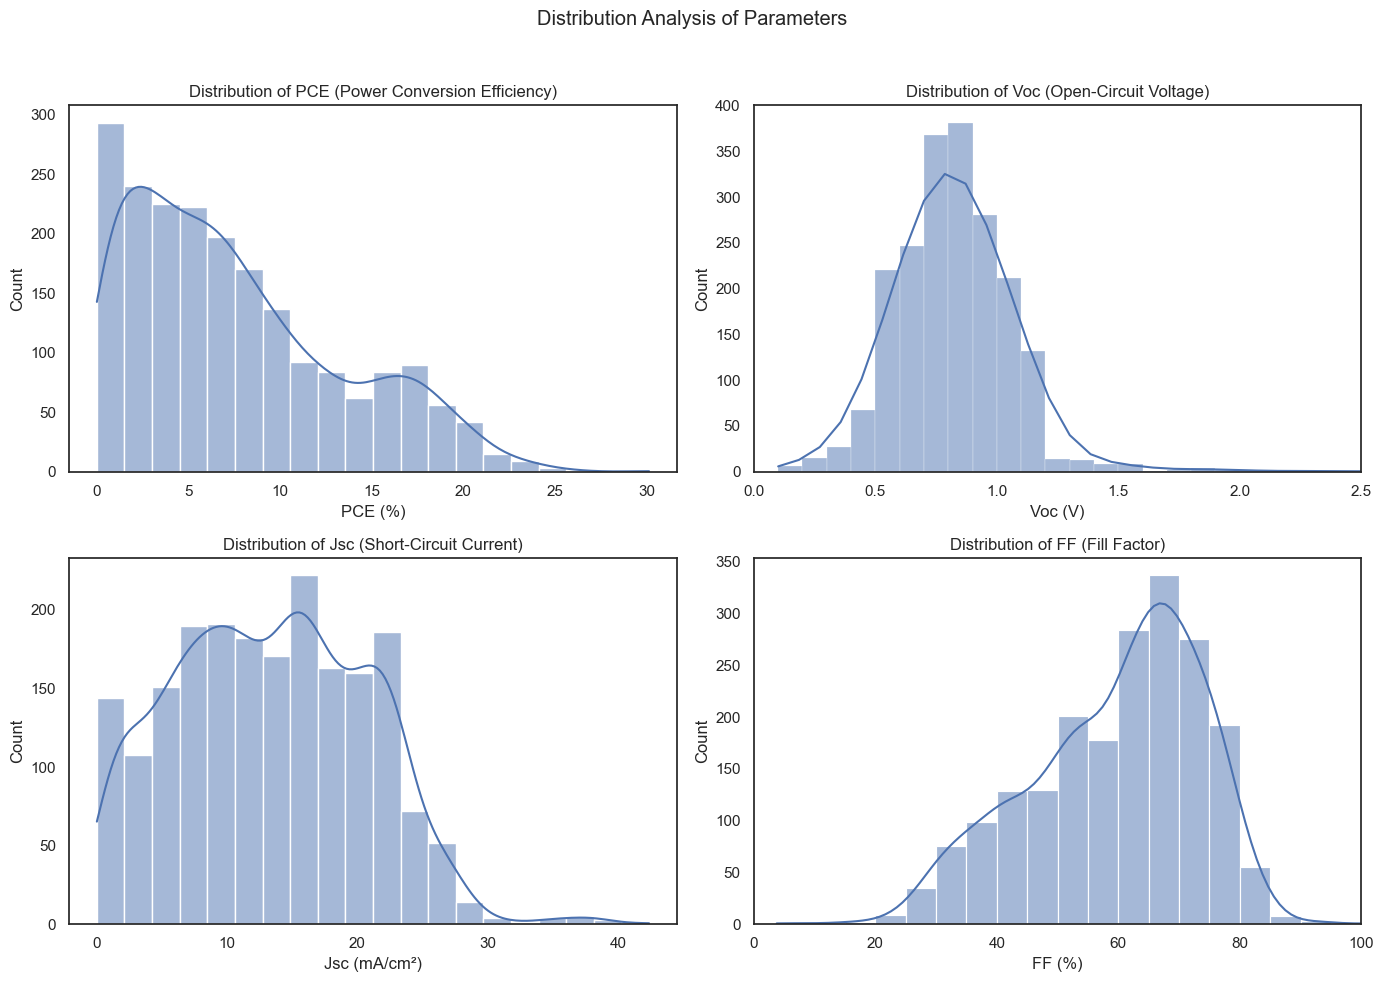

In [16]:
# 导入绘图库
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 设置绘图风格
sns.set(style="white")

# 绘制各参数的分布直方图
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution Analysis of Parameters")

sns.histplot(correct_data_pd['PCE_value'], kde=True, bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of PCE (Power Conversion Efficiency)')
axes[0, 0].set_xlabel('PCE (%)')

sns.histplot(correct_data_pd['Voc_value'], kde=True, bins=np.arange(0, 2.5, 0.1), ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Voc (Open-Circuit Voltage)')
axes[0, 1].set_xlabel('Voc (V)')
axes[0, 1].set_xlim([0, 2.5]) 

sns.histplot(correct_data_pd['Jsc_value'], kde=True, bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Jsc (Short-Circuit Current)')
axes[1, 0].set_xlabel('Jsc (mA/cm²)')

sns.histplot(correct_data_pd['FF_value'], kde=True, bins=np.arange(0, 100, 5), ax=axes[1, 1])
axes[1, 1].set_title('Distribution of FF (Fill Factor)')
axes[1, 1].set_xlabel('FF (%)')
axes[1, 1].set_xlim([0, 100]) 

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


分布分析结果

PCE (Power Conversion Efficiency): 数据呈现右偏分布，大部分值集中在较低的转换效率范围内。
Voc (Open-Circuit Voltage): 数据分布相对均匀，没有明显的偏斜。
Jsc (Short-Circuit Current): 数据呈现右偏分布，大部分值集中在较低的短路电流范围内。
FF (Fill Factor): 数据分布相对均匀，大部分值集中在50%到70%的范围内。

2. 相关性分析
接下来，我们将计算各参数之间的皮尔逊相关系数，并通过热图进行可视化，以了解各参数之间的线性相关性。

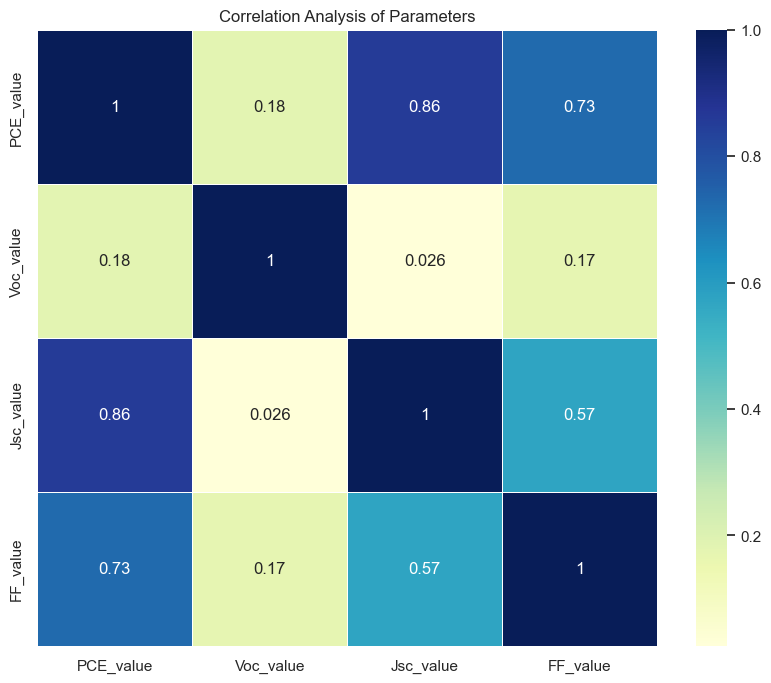

In [17]:
# 计算参数之间的皮尔逊相关系数
correlation_matrix = correct_data_pd[['PCE_value', 'Voc_value', 'Jsc_value', 'FF_value']].corr()

# 绘制热图展示相关性
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Correlation Analysis of Parameters")
plt.show()


3. 类别分析
接下来，我们将分析 "Absorber Layer" 下各类别的参数统计特性。我们可以通过箱线图来展示不同类别下的参数分布。
首先，让我们通过分析各个吸收层（Absorber Layer）的样本数量来确定哪些类别是最具代表性的。

In [18]:
absorber_layer_counts = correct_data_pd['Absorber Layer'].value_counts()

# Displaying the top 50 Absorber Layers
top_50_absorber_layers = absorber_layer_counts.head(50)
top_50_absorber_layers

Absorber Layer
N/A                                     48
MAPbI3                                  46
CH3NH3PbI3                              34
TiO2                                    26
PTB7:PC71BM                             25
P3HT:PCBM                               23
Perovskite                              21
ZnO                                     16
CH3NH3PbI3−xClx                         11
PM6:Y6                                   9
CsPbBr3                                  9
PTB7-Th:Coi8DFIC:PC61BM                  9
P1                                       8
CsPbI2Br                                 7
PbS                                      7
P3HT                                     6
Pt                                       6
Not provided                             6
PTB7-Th:PC71BM                           6
P3HT:PC61BM                              6
CsPbI3                                   6
P2                                       6
Sb2S3                                  

In [19]:
# 计算各个Absorber Layer的样本数量
absorber_layer_counts = correct_data_pd['Absorber Layer'].value_counts()

# 显示前20个最常见的Absorber Layer
top_20_absorber_layers = absorber_layer_counts.head(50)
top_20_absorber_layers


Absorber Layer
N/A                                     48
MAPbI3                                  46
CH3NH3PbI3                              34
TiO2                                    26
PTB7:PC71BM                             25
P3HT:PCBM                               23
Perovskite                              21
ZnO                                     16
CH3NH3PbI3−xClx                         11
PM6:Y6                                   9
CsPbBr3                                  9
PTB7-Th:Coi8DFIC:PC61BM                  9
P1                                       8
CsPbI2Br                                 7
PbS                                      7
P3HT                                     6
Pt                                       6
Not provided                             6
PTB7-Th:PC71BM                           6
P3HT:PC61BM                              6
CsPbI3                                   6
P2                                       6
Sb2S3                                  

In [20]:
aperovskite = [3,4,10,15,35]
quantum_dots = [16]
thin_film = [24,40,26]
oxide_semiconductor = [43]
organic = [6,7,13,20,21,27,11,36]

adjusted_aperovskite = [x - 2 for x in aperovskite]
adjusted_quantum_dots = [x - 2 for x in quantum_dots]
adjusted_thin_film = [x - 2 for x in thin_film]
adjusted_oxide_semiconductor = [x - 2 for x in oxide_semiconductor]
adjusted_organic = [x - 2 for x in organic]

# Combining all the adjusted lists into one
combined_list = adjusted_aperovskite + adjusted_quantum_dots + adjusted_thin_film + adjusted_oxide_semiconductor + adjusted_organic
combined_list



[1, 2, 8, 13, 33, 14, 22, 38, 24, 41, 4, 5, 11, 18, 19, 25, 9, 34]

In [21]:
selected_data = correct_data_pd[correct_data_pd['Absorber Layer'].isin(top_50_absorber_layers.index[combined_list])]


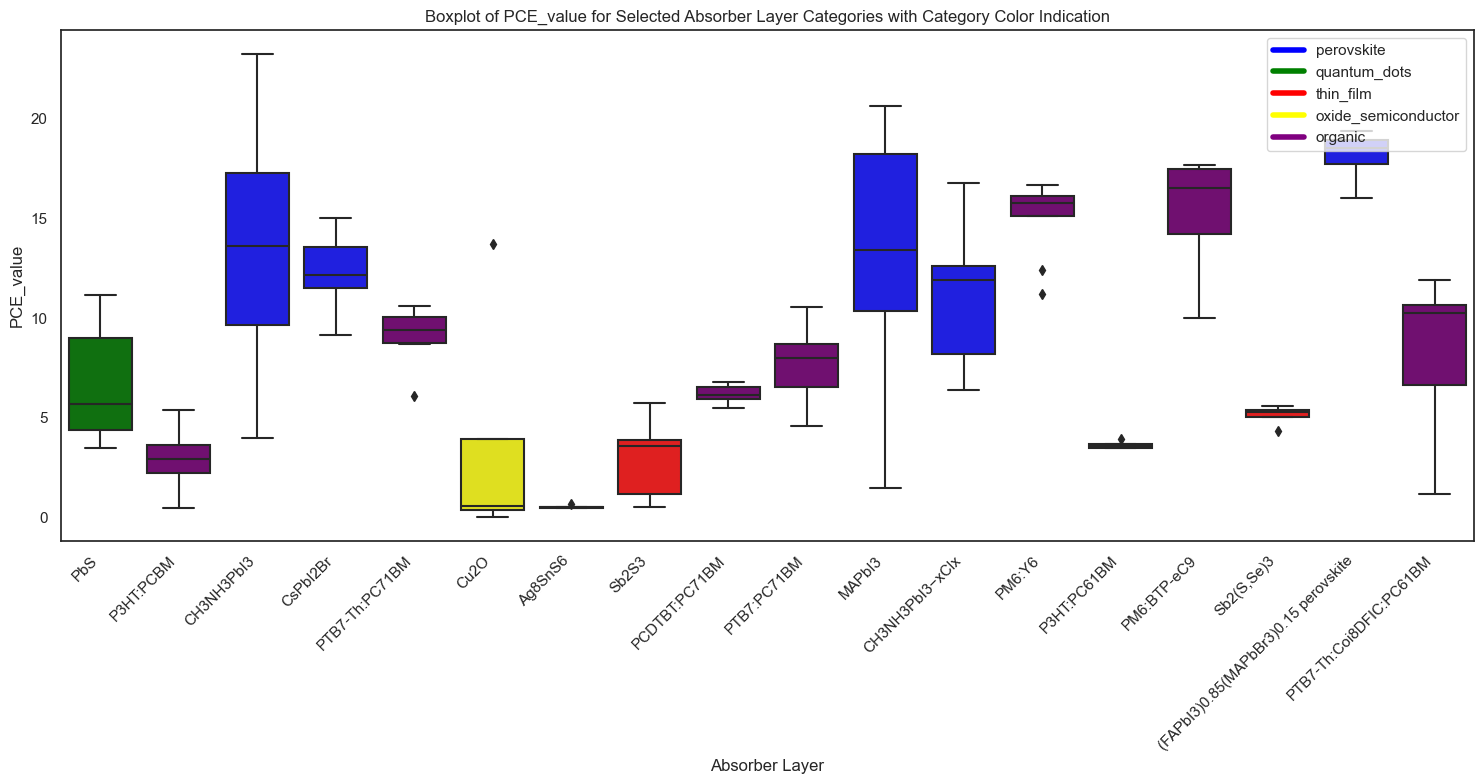

In [22]:
# Defining a color palette for each category
palette = {
    category: 'blue' for category in top_50_absorber_layers.index[adjusted_aperovskite]
}
palette.update({category: 'green' for category in top_50_absorber_layers.index[adjusted_quantum_dots]})
palette.update({category: 'red' for category in top_50_absorber_layers.index[adjusted_thin_film]})
palette.update({category: 'yellow' for category in top_50_absorber_layers.index[adjusted_oxide_semiconductor]})
palette.update({category: 'purple' for category in top_50_absorber_layers.index[adjusted_organic]})

# Plotting the boxplot with colors indicating each category
plt.figure(figsize=(15,8))
sns.boxplot(data=selected_data, x='Absorber Layer', y='PCE_value', palette=palette)
plt.xticks(rotation=45, ha='right')

# Creating custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='perovskite'),
                   Line2D([0], [0], color='green', lw=4, label='quantum_dots'),
                   Line2D([0], [0], color='red', lw=4, label='thin_film'),
                   Line2D([0], [0], color='yellow', lw=4, label='oxide_semiconductor'),
                   Line2D([0], [0], color='purple', lw=4, label='organic')]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Boxplot of PCE_value for Selected Absorber Layer Categories with Category Color Indication')
plt.tight_layout()
plt.show()


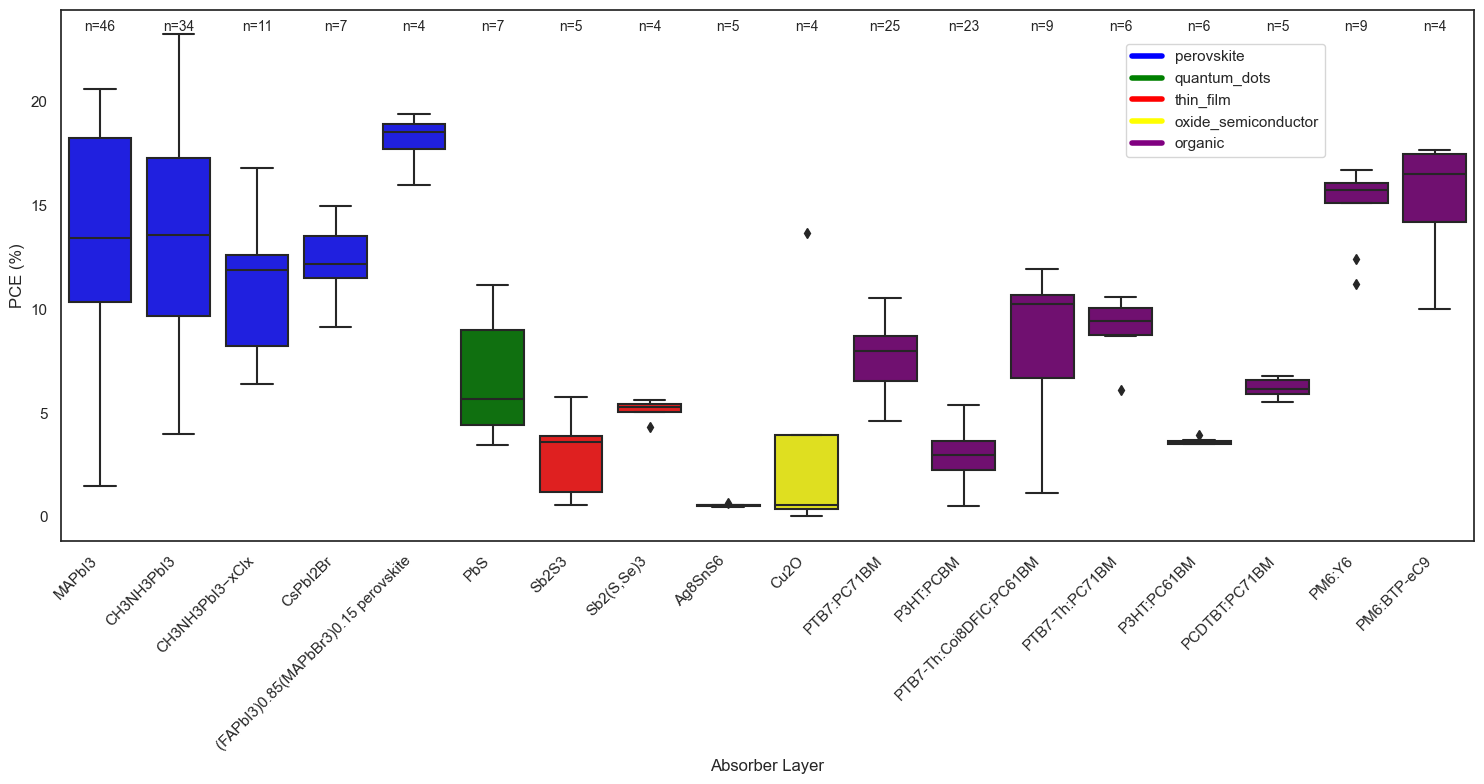

In [23]:
# Defining the order based on the combined_list
order = top_50_absorber_layers.index[combined_list].tolist()

# Plotting the boxplot with the specified order
plt.figure(figsize=(15,8))
sns.boxplot(data=selected_data, x='Absorber Layer', y='PCE_value', palette=palette, order=order) #showfliers=False)
plt.xticks(rotation=45, ha='right')

plt.ylabel('PCE (%)')


for i, category in enumerate(order):
    count = top_50_absorber_layers[category]
    plt.text(i, selected_data['PCE_value'].max(), 'n=' + str(count), ha='center', va='bottom', fontsize=10)


# Using the same legend as before
plt.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(0.9, 0.95))

#plt.title('Boxplot of PCE_value for Selected Absorber Layer Categories Ordered by combined_list')
plt.tight_layout()
plt.show()


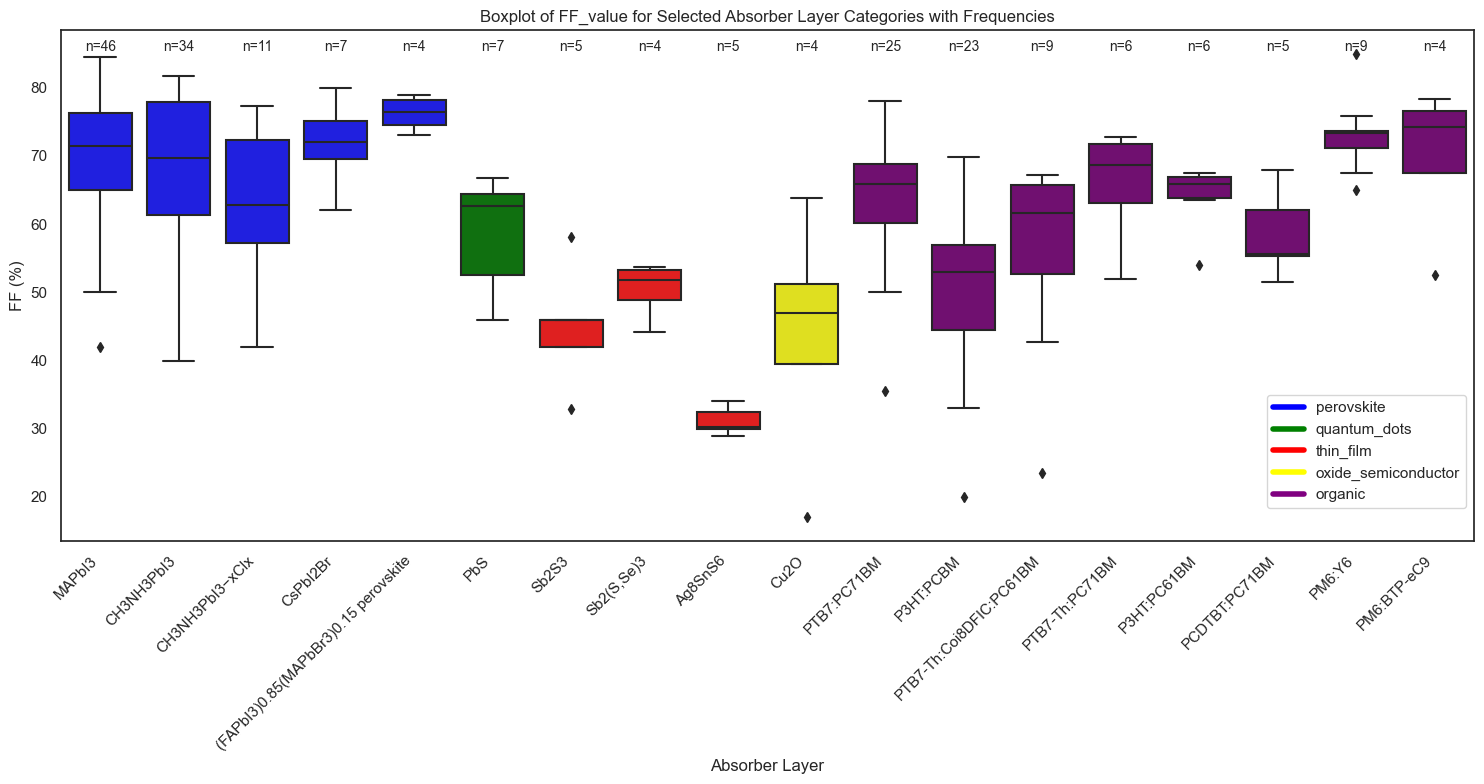

In [24]:
# Function to plot boxplot for a given column with frequencies
def plot_boxplot_with_frequencies(column_name,ylabel,title,legend_loc):
    plt.figure(figsize=(15,8))
    sns.boxplot(data=selected_data, x='Absorber Layer', y=column_name, palette=palette, order=order)
    plt.xticks(rotation=45, ha='right')
    
    # Adding the counts/frequency on top of each box
    for i, category in enumerate(order):
        count = top_50_absorber_layers[category]
        plt.text(i, selected_data[column_name].max(), 'n=' + str(count), ha='center', va='bottom', fontsize=10)
    
    # Using the same legend as before
    plt.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=legend_loc)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Plotting boxplot for FF_value
plot_boxplot_with_frequencies('FF_value','FF (%)', 'Boxplot of FF_value for Selected Absorber Layer Categories with Frequencies',(1, 0.3))


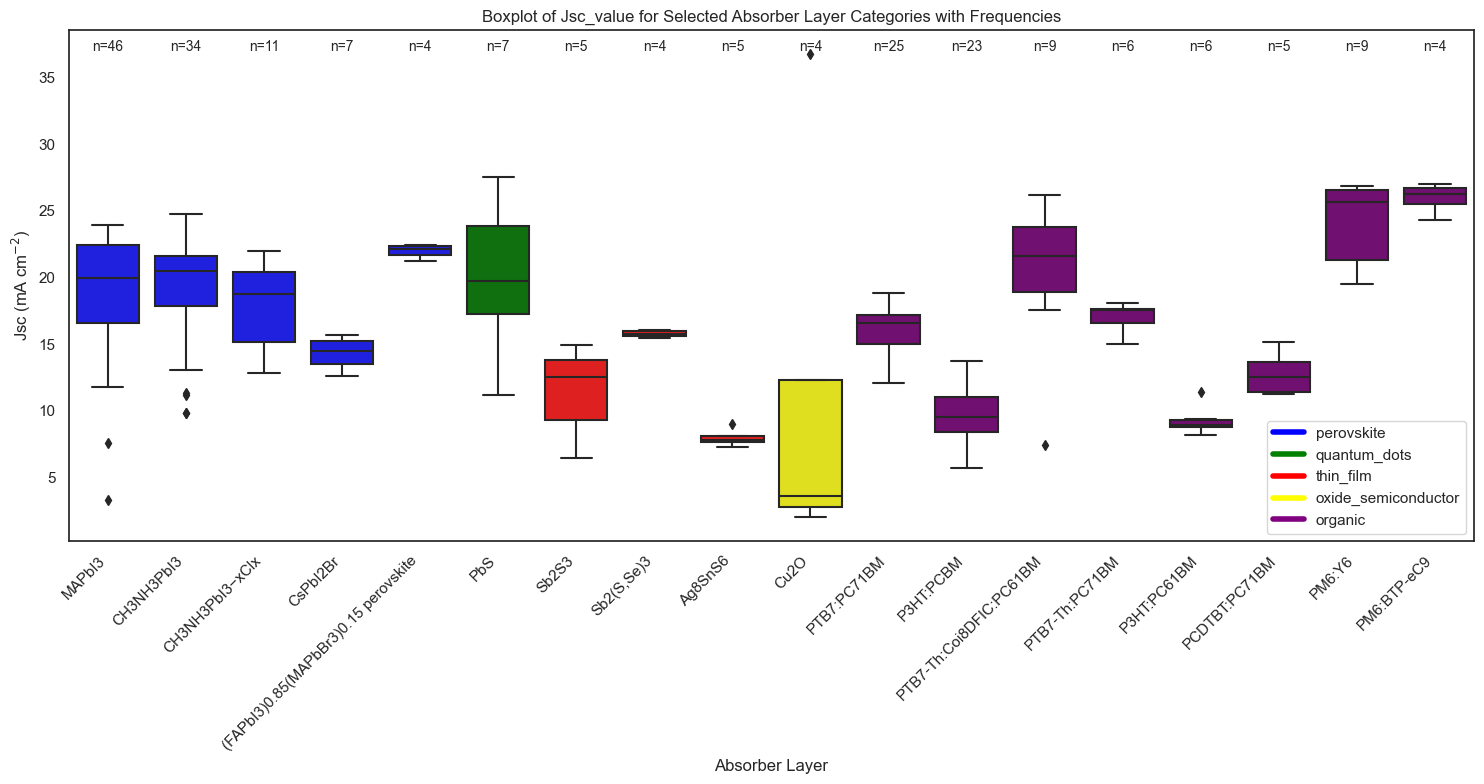

In [25]:
# Plotting boxplot for Jsc_value
plot_boxplot_with_frequencies('Jsc_value',r"Jsc (mA cm$^{-2}$)", 'Boxplot of Jsc_value for Selected Absorber Layer Categories with Frequencies',(1,0.25))


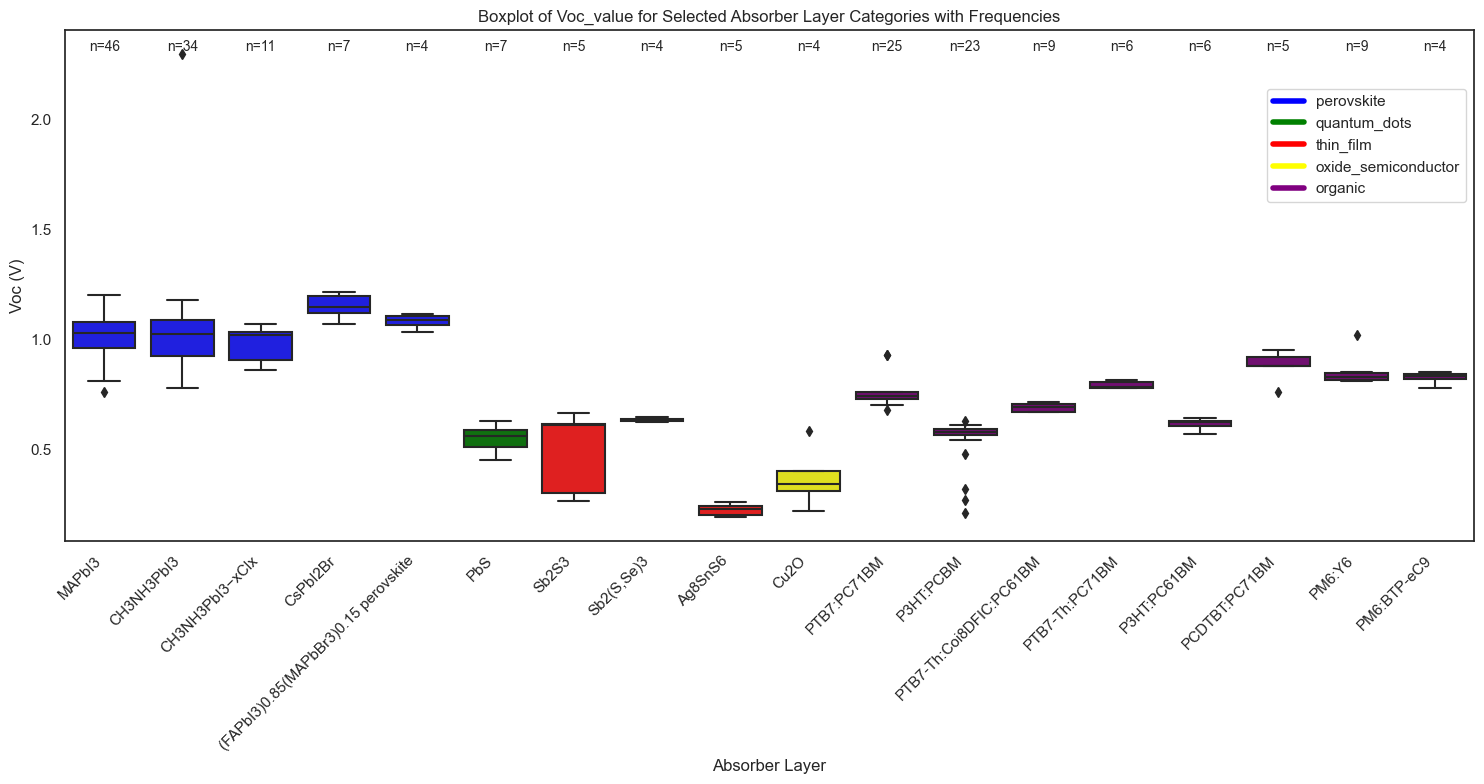

In [26]:
# Plotting boxplot for Voc_value
plot_boxplot_with_frequencies('Voc_value',"Voc (V)",'Boxplot of Voc_value for Selected Absorber Layer Categories with Frequencies',(1,0.9))


/Users/yitengxu/.conda/envs/paperqa/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


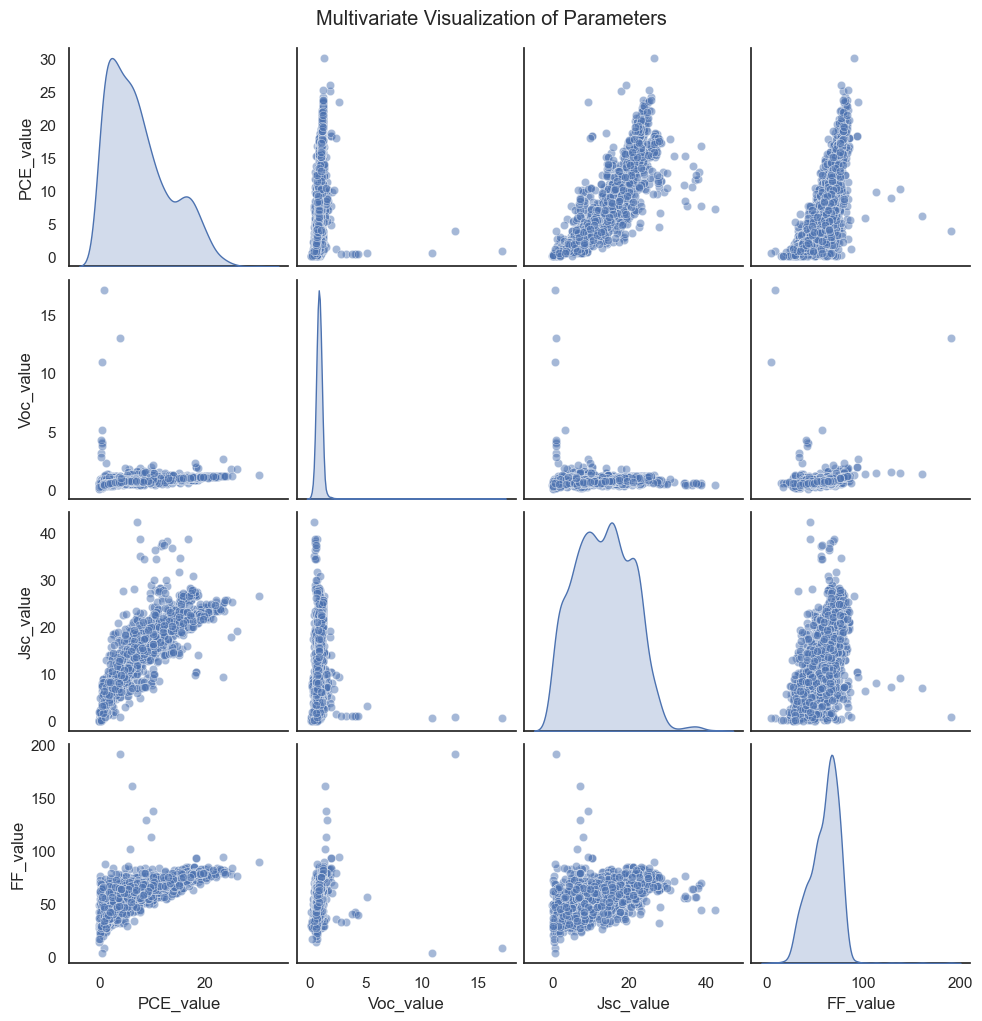

In [44]:
# 绘制散点图矩阵，展示多个变量之间的关系
sns.pairplot(correct_data_pd, vars=['PCE_value', 'Voc_value', 'Jsc_value', 'FF_value'], diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle('Multivariate Visualization of Parameters', y=1.02)
plt.show()

多变量可视化
让我们通过散点图矩阵展示多个变量之间的关系，以提供多维度的数据视角。

/Users/yitengxu/.conda/envs/paperqa/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


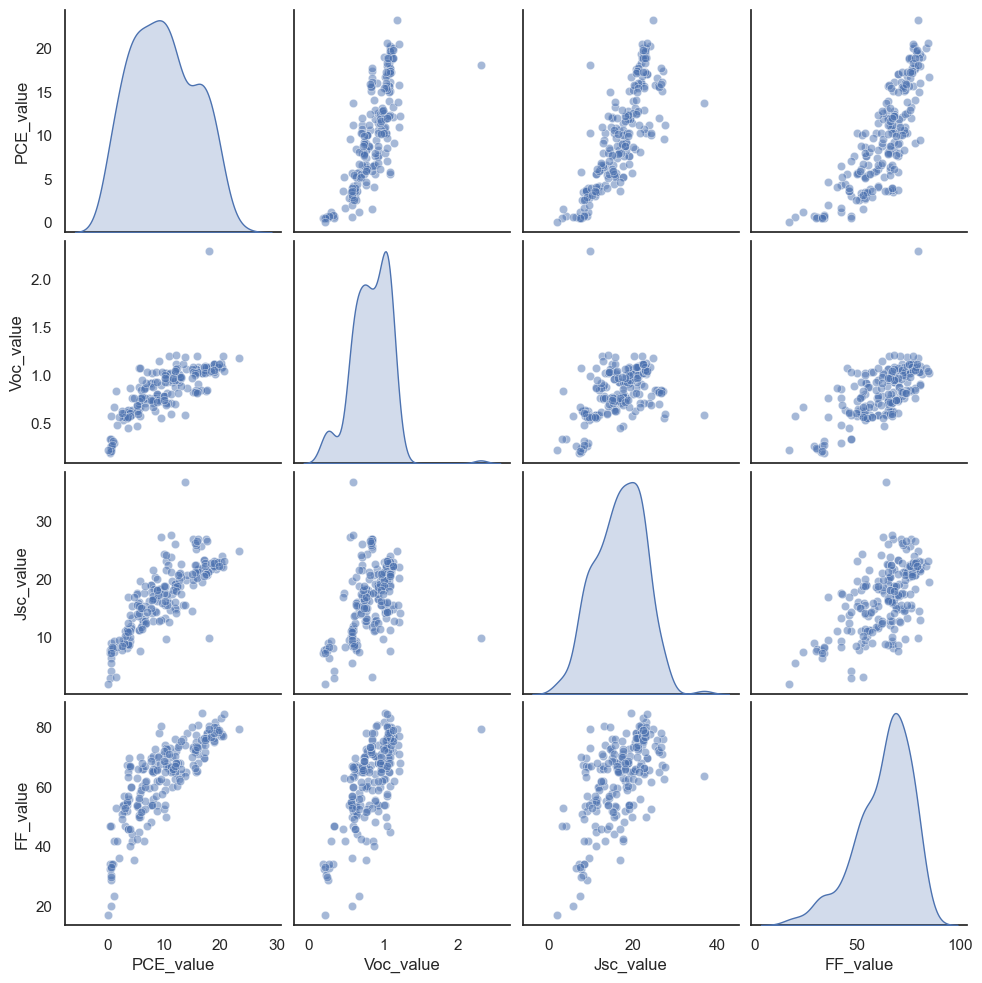

In [59]:
# 绘制散点图矩阵，展示多个变量之间的关系
sns.pairplot(selected_data, vars=['PCE_value', 'Voc_value', 'Jsc_value', 'FF_value'], diag_kind="kde", plot_kws={'alpha':0.5})
#plt.suptitle('Multivariate Visualization of Parameters', y=1.02)
plt.show()


预测任务：预测 PCE (Power Conversion Efficiency)
我们将使用 Voc（开路电压）、Jsc（短路电流）和 FF（填充因子）作为特征，尝试预测 PCE（转换效率）。我们可以选择合适的回归模型进行训练，并评估模型的性能。

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 选择特征和目标变量
X = correct_data_pd[['Voc_value', 'Jsc_value', 'FF_value']]
y = correct_data_pd['PCE_value']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
linear_model = LinearRegression()

# 训练模型
linear_model.fit(X_train, y_train)

# 预测测试集
y_pred = linear_model.predict(X_test)

# 计算性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('The Mean Squared Error(mse) is '+ str(mse))
print('The R squared fraction is '+ str(r2))


The Mean Squared Error(mse) is 5.211391426089744
The R squared fraction is 0.8516121703704318


In [56]:
# Filtering the data for predictions where PCE is greater than 30%
high_pce_predicted_data = predicted_df[predicted_df['Predicted_PCE'] > 30]

high_pce_predicted_data

,Predicted_PCE,Predicted_FF,Predicted_Voc,Predicted_Jsc
925,30.12,89.92,1.26,26.61


In [58]:
high_pce_correct_data = correct_data_pd[correct_data_pd['PCE_value'] > 30]
high_pce_correct_data

,Absorber Layer,PCE_value,PCE_error,Voc_value,Voc_error,Jsc_value,Jsc_error,FF_value,FF_error
925,FASnI3,30.12,NaN,1.26,NaN,26.61,NaN,89.92,"(89.92, None)"


In [47]:
print(len(y_pred_with_calculated_PCE_copy))

405


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

# Reloading the data
correct_data_pd = pd.read_csv("/Users/yitengxu/Desktop/PaperScraper-Final/result_collected/correct_data.csv")

# Pre-processing the data
X_simple = correct_data_pd[['Voc_value', 'Jsc_value', 'FF_value']]
y_simple = correct_data_pd[['PCE_value', 'FF_value', 'Voc_value', 'Jsc_value']]

# Splitting the dataset
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Creating and training an XGBoost regression model for multi-output regression
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=300, max_depth=15, random_state=42, learning_rate=0.05))
xgb_model.fit(X_train_simple, y_train_simple)

# Predicting on the entire dataset using the XGBoost model
all_xgb_predictions = xgb_model.predict(X_simple)

# Convert predictions to a DataFrame for easier operations
xgb_predicted_df = pd.DataFrame(all_xgb_predictions, columns=['Predicted_PCE', 'Predicted_FF', 'Predicted_Voc', 'Predicted_Jsc'])

# Filter the data for predictions where PCE is greater than 35%
high_pce_xgb_predictions = xgb_predicted_df[xgb_predicted_df['Predicted_PCE'] > 28]

high_pce_xgb_predictions


,Predicted_PCE,Predicted_FF,Predicted_Voc,Predicted_Jsc
925,30.10573,89.919998,1.259826,26.608891


In [97]:
high_pce_xgb_predictions = xgb_predicted_df[xgb_predicted_df['Predicted_PCE'] > 25]

high_pce_xgb_predictions

,Predicted_PCE,Predicted_FF,Predicted_Voc,Predicted_Jsc
199,25.000261,78.599335,1.779894,17.808985
200,25.993404,76.601799,1.769897,19.219681
925,30.105730,89.919998,1.259826,26.608891
2006,25.169838,84.039894,1.183944,25.300745


In [77]:
print(xgb_predicted_df)

      Predicted_PCE  Predicted_FF  Predicted_Voc  Predicted_Jsc
0         10.052526     70.998329       0.790002      17.918978
1         22.500299     80.841171       1.160004      23.990622
2          5.288564     67.999550       0.620019      12.600231
3          5.700994     50.000729       0.580028      19.698589
4          4.153500     57.000572       0.540036      17.529585
...             ...           ...            ...            ...
2018       6.015016     52.082230       0.779343      14.859008
2019       8.430199     59.002415       0.820000      17.453848
2020       9.122871     62.601780       0.750005      19.379375
2021       8.249416     58.902802       0.670015      20.980686
2022       6.996064     62.997173       0.800001      13.699751

[2023 rows x 4 columns]


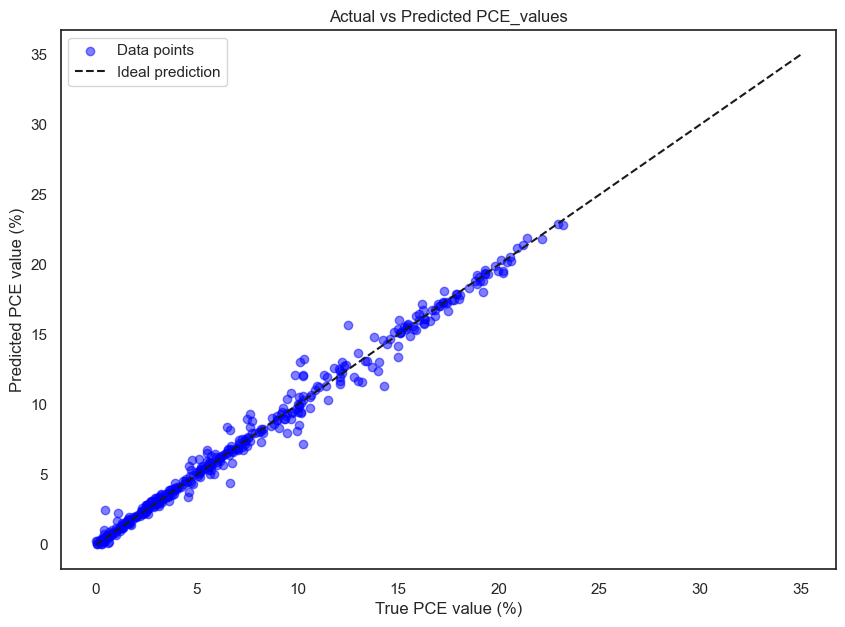

(0.10551187349851918, 0.1060931382164769, 0.9931939134523374)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Using the trained model to make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.scatter(y_test['PCE_value'], y_pred[:, 0], color='blue', alpha=0.5, label="Data points")
plt.plot([0, 35], [0, 35], '--k', label="Ideal prediction")
plt.xlabel('True PCE value (%)')
plt.ylabel('Predicted PCE value (%)')
plt.title('Actual vs Predicted PCE_values')
plt.legend(loc="upper left")
plt.show()

mae, mse, r2


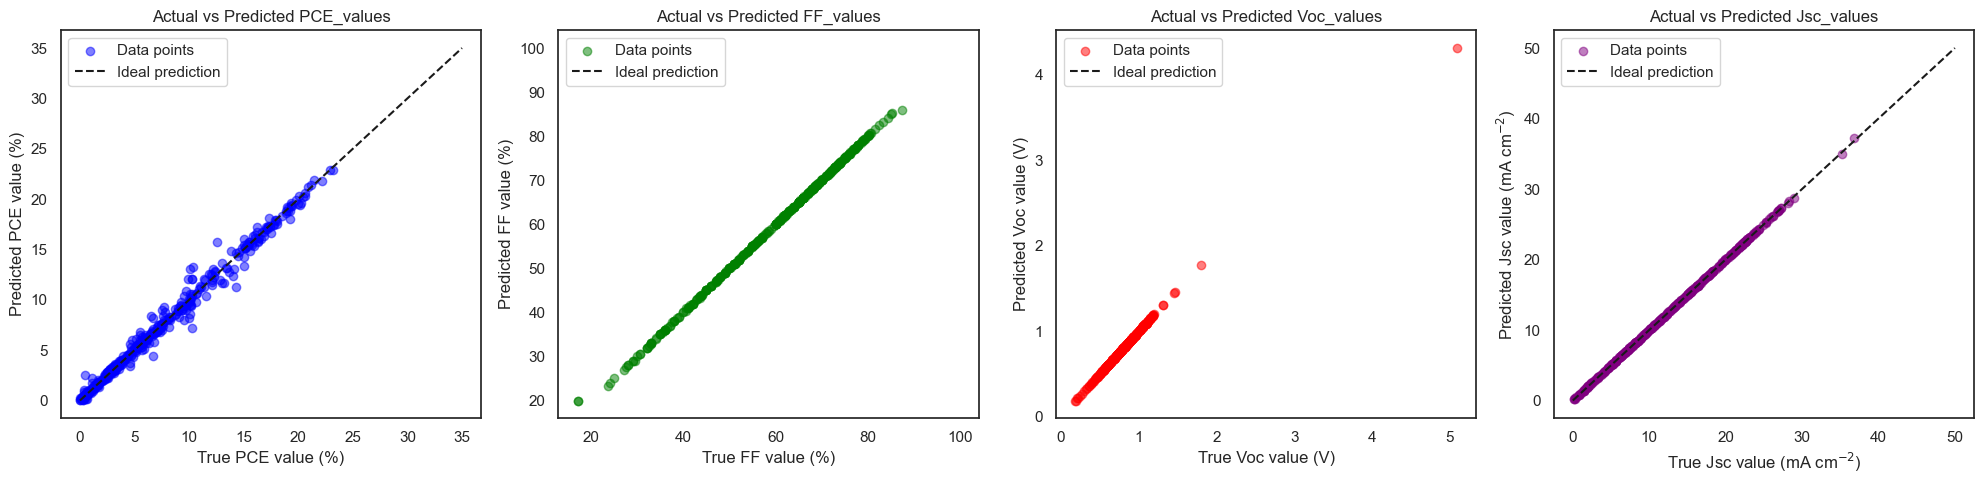

In [95]:
# Plotting actual vs predicted values for all parameters

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plotting for PCE
axes[0].scatter(y_test['PCE_value'], y_pred[:, 0], color='blue', alpha=0.5, label="Data points")
axes[0].plot([0, 35], [0, 35], '--k', label="Ideal prediction")
axes[0].set_xlabel('True PCE value (%)')
axes[0].set_ylabel('Predicted PCE value (%)')
axes[0].set_title('Actual vs Predicted PCE_values')
axes[0].legend(loc="upper left")

# Plotting for FF
axes[1].scatter(y_test['FF_value'], y_pred[:, 1], color='green', alpha=0.5, label="Data points")
axes[1].plot([100], [100], '--k', label="Ideal prediction")
axes[1].set_xlabel('True FF value (%)')
axes[1].set_ylabel('Predicted FF value (%)')
axes[1].set_title('Actual vs Predicted FF_values')
axes[1].legend(loc="upper left")

# Plotting for Voc
axes[2].scatter(y_test['Voc_value'], y_pred[:, 2], color='red', alpha=0.5, label="Data points")
axes[2].plot([1.5], [1.5], '--k', label="Ideal prediction")
axes[2].set_xlabel('True Voc value (V)')
axes[2].set_ylabel('Predicted Voc value (V)')
axes[2].set_title('Actual vs Predicted Voc_values')
axes[2].legend(loc="upper left")

# Plotting for Jsc
axes[3].scatter(y_test['Jsc_value'], y_pred[:, 3], color='purple', alpha=0.5, label="Data points")
axes[3].plot([0, 50], [0, 50], '--k', label="Ideal prediction")
axes[3].set_xlabel(r'True Jsc value (mA cm$^{-2}$)')
axes[3].set_ylabel(r'Predicted Jsc value (mA cm$^{-2}$)')
axes[3].set_title('Actual vs Predicted Jsc_values')
axes[3].legend(loc="upper left")

# Adjusting layout
plt.tight_layout()
plt.show()


In [73]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Standardizing the data
scaler_X = StandardScaler().fit(X_train_simple)
scaler_Y = StandardScaler().fit(y_train_simple)

X_train_scaled = scaler_X.transform(X_train_simple)
y_train_scaled = scaler_Y.transform(y_train_simple)

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='linear'))  # 4 output neurons for PCE, FF, Voc, Jsc

model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=10, verbose=0)

# Predict on the entire dataset using the neural network
all_nn_predictions_scaled = model.predict(scaler_X.transform(X_simple))

# Convert scaled predictions back to original scale
all_nn_predictions = scaler_Y.inverse_transform(all_nn_predictions_scaled)

# Convert predictions to a DataFrame for easier operations
nn_predicted_df = pd.DataFrame(all_nn_predictions, columns=['Predicted_PCE', 'Predicted_FF', 'Predicted_Voc', 'Predicted_Jsc'])

# Applying constraints based on the formula and basic values
nn_predicted_df['Predicted_PCE'] = np.clip(nn_predicted_df['Predicted_PCE'], 0, 100)
nn_predicted_df['Predicted_FF'] = np.clip(nn_predicted_df['Predicted_FF'], 0, 100)
# Assuming Jsc to be between 0 to 50 mA/cm2 as a common range
#nn_predicted_df['Predicted_Jsc'] = np.clip(nn_predicted_df['Predicted_Jsc'], 0, 50)




2023-08-25 15:33:02.065153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


64/64 [==============================] - 0s 942us/step


,Predicted_PCE,Predicted_FF,Predicted_Voc,Predicted_Jsc


In [79]:
# Filter the data for predictions where PCE is greater than 35%
high_pce_nn_predictions = nn_predicted_df[nn_predicted_df['Predicted_PCE'] > 28]

len (nn_predicted_df)

2023